In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os

# create file path
file_path = '/content/drive/MyDrive/Machine_Learning_Project/World_Happiness_ML.csv'

# Read the csv file
happiness_df = pd.read_csv(file_path)

# Verify the file was read correctly
happiness_df

,Country name,alpha-3,region,sub-region,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Life Ladder
0,Afghanistan,AFG,Asia,Southern Asia,2008,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,3.723590
1,Afghanistan,AFG,Asia,Southern Asia,2009,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,4.401778
2,Afghanistan,AFG,Asia,Southern Asia,2010,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,4.758381
3,Afghanistan,AFG,Asia,Southern Asia,2011,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,3.831719
4,Afghanistan,AFG,Asia,Southern Asia,2012,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,3.782938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,2019,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354,2.693523
2359,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,2020,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736,3.159802
2360,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,2021,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682,3.154578
2361,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,2022,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350,3.296220


**RANDOM FORREST MODEL**





In [ ]:
#Create copy of the dataframe
happy_df= happiness_df.copy()

In [ ]:
# Drop unnecesary columns from data set "Country name" and "year"
happy_df.drop(columns=["Country name", "alpha-3", "sub-region", "region", "year"], inplace=True)
happy_df.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Life Ladder
0,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,3.723590
1,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,4.401778
2,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,4.758381
3,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,3.831719
4,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,3.782938


In [ ]:
#Identify features
X = happy_df.drop('Life Ladder', axis=1)

In [ ]:
#Identify target variable
y = happy_df['Life Ladder']
y[:5]

,Life Ladder
0,3.723590
1,4.401778
2,4.758381
3,3.831719
4,3.782938


In [ ]:
# Proper train_test_split(try changing random state )
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
#Create and train Random Forest Regressor
rf_model = RandomForestRegressor(
   n_estimators=500,  # the number of trees
   random_state=78
)

In [ ]:
# Fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=78)

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.15392384925733996
R-squared Score: 0.8782121750688385


In [ ]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                            feature  importance
0                Log GDP per capita    0.565199
6                   Positive affect    0.137844
2  Healthy life expectancy at birth    0.115829
1                    Social support    0.068670
3      Freedom to make life choices    0.031179
4                        Generosity    0.027377
5         Perceptions of corruption    0.027303
7                   Negative affect    0.026599


In [ ]:
#Checking for overfitting
rf_model.fit(X_train, y_train)

train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print("Overfitting Diagnostics:")
print(" Performance Comparison:")
print(f"   Training R² Score: {train_r2:.4f}")
print(f"   Testing R² Score:  {test_r2:.4f}")
print(f"   Training MSE:      {train_mse:.4f}")
print(f"   Testing MSE:       {test_mse:.4f}")


Overfitting Diagnostics:
 Performance Comparison:
   Training R² Score: 0.9810
   Testing R² Score:  0.8782
   Training MSE:      0.0241
   Testing MSE:       0.1539


Due to overfitting of this model, more parameters were added to create a new model.

---



**RANDOM FOREST MODEL 2**

In [ ]:
#Identify features
X = happy_df.drop('Life Ladder', axis=1)

In [ ]:
#Identify target variable
y = happy_df['Life Ladder']
y[:5]

,Life Ladder
0,3.723590
1,4.401778
2,4.758381
3,3.831719
4,3.782938


In [ ]:
# Proper train_test_split(try changing random state )
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
#Create and train Random Forest Regressor
rf_model = RandomForestRegressor(
   n_estimators=500,  # the number of trees
   max_depth=10,      # maximum depth for the trees
   min_samples_split=10,  # minimum number of samples required to split an internal node
   max_features='sqrt',  # max features to consider
   min_samples_leaf=1,
   random_state=42
)

In [ ]:
# Fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=10,
                      n_estimators=500, random_state=42)

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.20429895381465352
R-squared Score: 0.8400242395574247


In [ ]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                            feature  importance
0                Log GDP per capita    0.278321
2  Healthy life expectancy at birth    0.228488
1                    Social support    0.200588
6                   Positive affect    0.094880
3      Freedom to make life choices    0.083189
5         Perceptions of corruption    0.058214
7                   Negative affect    0.030206
4                        Generosity    0.026115


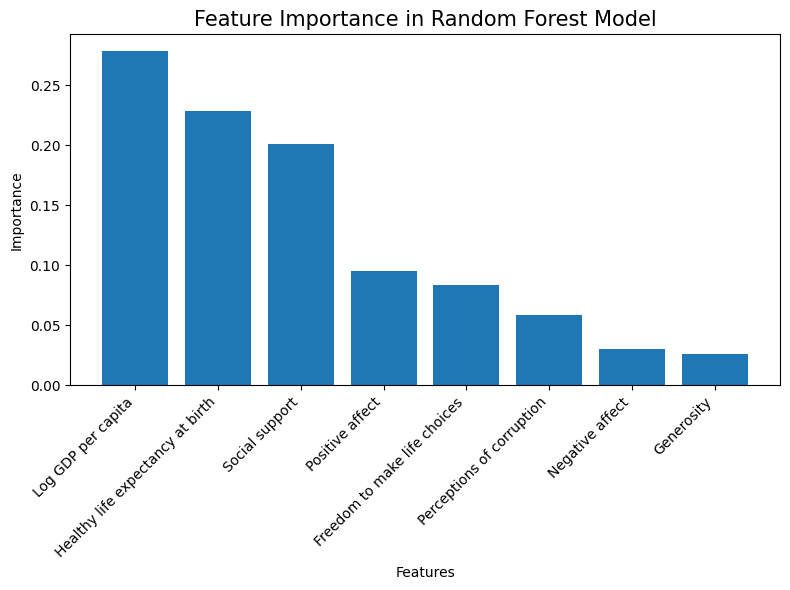

In [ ]:
#Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance in Random Forest Model', fontsize=15)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#Checking for overfitting
rf_model.fit(X_train, y_train)

train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print("Overfitting Diagnostics:")
print("Performance Comparison:")
print(f"   Training R² Score: {train_r2:.4f}")
print(f"   Testing R² Score:  {test_r2:.4f}")
print(f"   Training MSE:      {train_mse:.4f}")
print(f"   Testing MSE:       {test_mse:.4f}")


Overfitting Diagnostics:
Performance Comparison:
   Training R² Score: 0.9306
   Testing R² Score:  0.8400
   Training MSE:      0.0877
   Testing MSE:       0.2043


This model was used for comparison becuase the new parameters decreased the overfitting, even though the testing R2 was lower.


---



**RANDOM FOREST WITH REGIONS**





In [ ]:
#Create copy of dataframe
world_happiness_data_region_df = happiness_df.copy()

In [ ]:
# Drop columns that are not needed
world_happiness_data_region_df = world_happiness_data_region_df.drop(columns=["Country name", "alpha-3", "sub-region", "year"])
world_happiness_data_region_df.head()

,region,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Life Ladder
0,Asia,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,3.723590
1,Asia,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,4.401778
2,Asia,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,4.758381
3,Asia,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,3.831719
4,Asia,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,3.782938


In [ ]:
# Create dummie variables for region
region_dummies = pd.get_dummies(world_happiness_data_region_df["region"]).astype(int)
region_dummies.head()

,Africa,Americas,Asia,Europe,Oceania
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [ ]:
# Join the the region_dummies and the world_happiness_data_region_df
world_happiness_data_region_df = pd.concat([world_happiness_data_region_df, region_dummies], axis=1)

# Identify features
X1 = world_happiness_data_region_df.drop(columns=["region", "Life Ladder"])
X1.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Africa,Americas,Asia,Europe,Oceania
0,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,0,0,1,0,0
1,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,0,0,1,0,0
2,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,0,0,1,0,0
3,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,0,0,1,0,0
4,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,0,0,1,0,0


In [ ]:
#Identify target variables
y1 = world_happiness_data_region_df["Life Ladder"]
y1.head()

,Life Ladder
0,3.723590
1,4.401778
2,4.758381
3,3.831719
4,3.782938


In [ ]:
# Splitting into Train and Test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=78)

In [ ]:
#Create and train Random Forest Regressor
rf_model1 = RandomForestRegressor(
   n_estimators=500,  # the number of trees
   max_depth=10,      # maximum depth for the trees
   min_samples_split=10,  # minimum number of samples required to split an internal node
   max_features='sqrt',  # max features to consider
   min_samples_leaf=1,
   random_state=42
)

In [ ]:
# Fit the model
rf_model1.fit(X1_train, y1_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=10,
                      n_estimators=500, random_state=42)

In [ ]:
# Making predictions using the testing data
predictions1 = rf_model1.predict(X1_test)

In [ ]:
# Regression evaluation metrics using scikit-learn

# Mean Absolute Error (MAE):
mae1 = mean_absolute_error(y1_test, predictions1)
print(f'Region Mean Absolute Error (MAE): {mae1}')

# Mean Squared Error (MSE):
mse1 = mean_squared_error(y1_test, predictions1)
print(f'Region Mean Squared Error (MSE): {mse1}')

# Root Mean Squared Error (RMSE):
rmse1 = np.sqrt(mean_squared_error(y1_test, predictions1))
print(f'Region Root Mean Squared Error (RMSE): {rmse1}')

# R-squared (R²):
r2a = r2_score(y1_test, predictions1)
print(f'Region R-squared (R²): {r2a}')

Region Mean Absolute Error (MAE): 0.3050096352149028
Region Mean Squared Error (MSE): 0.15675142224609193
Region Root Mean Squared Error (RMSE): 0.3959184540357925
Region R-squared (R²): 0.8759749391512357


In [ ]:
# Feature Importance
feature_importance_region = pd.DataFrame({
    'feature': X1.columns,
    'importance': rf_model1.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_region)
feature_importance_region = feature_importance_region.sort_values('importance', ascending=False).head(8)
feature_importance_region




Feature Importance:
                             feature  importance
0                 Log GDP per capita    0.275841
2   Healthy life expectancy at birth    0.175276
1                     Social support    0.168749
6                    Positive affect    0.097455
3       Freedom to make life choices    0.069636
8                             Africa    0.066653
5          Perceptions of corruption    0.048616
7                    Negative affect    0.027427
4                         Generosity    0.024676
9                           Americas    0.020236
11                            Europe    0.013138
10                              Asia    0.012015
12                           Oceania    0.000282


,feature,importance
0,Log GDP per capita,0.275841
2,Healthy life expectancy at birth,0.175276
1,Social support,0.168749
6,Positive affect,0.097455
3,Freedom to make life choices,0.069636
8,Africa,0.066653
5,Perceptions of corruption,0.048616
7,Negative affect,0.027427


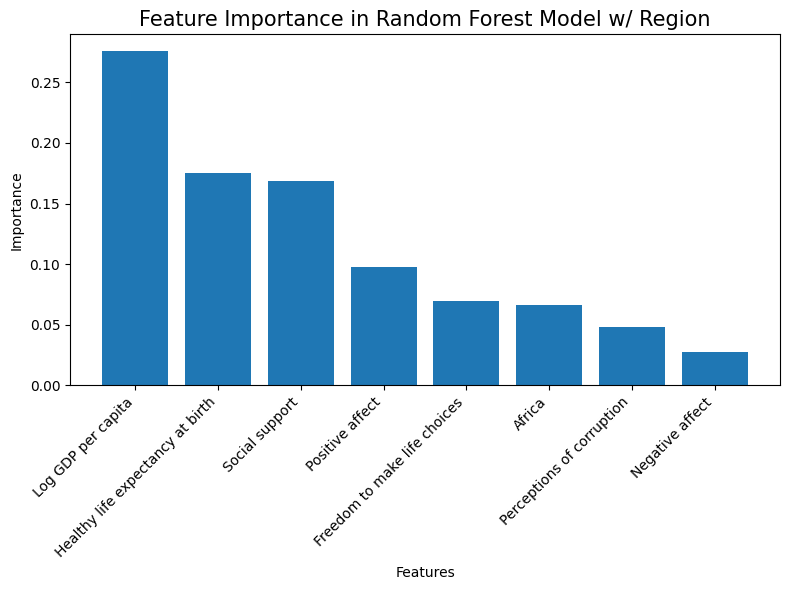

In [ ]:
#Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_region['feature'], feature_importance_region['importance'])
plt.title('Feature Importance in Random Forest Model w/ Region', fontsize=15)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#Checking for overfitting
rf_model1.fit(X1_train, y1_train)

train_pred1 = rf_model1.predict(X1_train)
test_pred1 = rf_model1.predict(X1_test)

train_r2_1 = r2_score(y1_train, train_pred1)
test_r2_1 = r2_score(y1_test, test_pred1)

train_mse1 = mean_squared_error(y1_train, train_pred1)
test_mse1 = mean_squared_error(y1_test, test_pred1)

print("Overfitting Diagnostics:")
print("Performance Comparison:")
print(f"   Training R² Score: {train_r2_1:.4f}")
print(f"   Testing R² Score:  {test_r2_1:.4f}")
print(f"   Training MSE:      {train_mse1:.4f}")
print(f"   Testing MSE:       {test_mse1:.4f}")

Overfitting Diagnostics:
Performance Comparison:
   Training R² Score: 0.9308
   Testing R² Score:  0.8760
   Training MSE:      0.0876
   Testing MSE:       0.1568


This model was used for comparison.

**RANDOM FOREST MODEL WITH SUBREGIONS**


---



In [ ]:
#Create copy of dataframe
world_happiness_data_subregion_df = happiness_df.copy()

In [ ]:
# Define features set
world_happiness_data_subregion_df = world_happiness_data_subregion_df.drop(columns=["Country name", "alpha-3", "region", "year"])
world_happiness_data_subregion_df.head()

,sub-region,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Life Ladder
0,Southern Asia,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,3.723590
1,Southern Asia,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,4.401778
2,Southern Asia,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,4.758381
3,Southern Asia,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,3.831719
4,Southern Asia,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,3.782938


In [ ]:
# Create dummie variables for sub-region
subregion_dummies = pd.get_dummies(world_happiness_data_subregion_df["sub-region"]).astype(int)
subregion_dummies.head()

,Australia and New Zealand,Central Asia,Eastern Asia,Eastern Europe,Latin America and the Caribbean,Northern Africa,Northern America,Northern Europe,South-eastern Asia,Southern Asia,Southern Europe,Sub-Saharan Africa,Western Asia,Western Europe
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Join the the region_dummies and the world_happiness_data_region_df
world_happiness_data_subregion_df = pd.concat([world_happiness_data_subregion_df, subregion_dummies], axis=1)

# Identify the features
X2 = world_happiness_data_subregion_df.drop(columns=["sub-region", "Life Ladder"])
X2.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Australia and New Zealand,Central Asia,...,Latin America and the Caribbean,Northern Africa,Northern America,Northern Europe,South-eastern Asia,Southern Asia,Southern Europe,Sub-Saharan Africa,Western Asia,Western Europe
0,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,0,0,...,0,0,0,0,0,1,0,0,0,0
1,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,0,0,...,0,0,0,0,0,1,0,0,0,0
2,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#Identify the target
y2 = world_happiness_data_subregion_df["Life Ladder"]
y2.head()

,Life Ladder
0,3.723590
1,4.401778
2,4.758381
3,3.831719
4,3.782938


In [ ]:
# Splitting into Train and Test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=78)

In [ ]:
#Create and train Random Forest Regressor
rf_model2 = RandomForestRegressor(
   n_estimators=500,  # the number of trees
   max_depth=10,      # maximum depth for the trees
   min_samples_split=10,  # minimum number of samples required to split an internal node
   max_features='sqrt',  # max features to consider
   min_samples_leaf=1,
   random_state=42
)

In [ ]:
# Fit the model
rf_model2.fit(X2_train, y2_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=10,
                      n_estimators=500, random_state=42)

In [ ]:
# Making predictions using the testing data
predictions2 = rf_model2.predict(X2_test)

In [ ]:
# Regression evaluation metrics using scikit-learn

# Mean Absolute Error (MAE):
mae2 = mean_absolute_error(y2_test, predictions2)
print(f'Sub-Region Mean Absolute Error (MAE): {mae2}')

# Mean Squared Error (MSE):
mse2 = mean_squared_error(y2_test, predictions2)
print(f'Sub-Region Mean Squared Error (MSE): {mse2}')

# Root Mean Squared Error (RMSE):
rmse2 = np.sqrt(mean_squared_error(y2_test, predictions2))
print(f'Sub-Region Root Mean Squared Error (RMSE): {rmse2}')

# R-squared (R²):
r2b = r2_score(y2_test, predictions2)
print(f'Sub-Region R-squared (R²): {r2b}')

Sub-Region Mean Absolute Error (MAE): 0.30670824280043973
Sub-Region Mean Squared Error (MSE): 0.15921622474326877
Sub-Region Root Mean Squared Error (RMSE): 0.39901907816953913
Sub-Region R-squared (R²): 0.8740247349660857


In [ ]:
# Feature Importance
feature_importance_subregion = pd.DataFrame({
    'feature': X2.columns,
    'importance': rf_model2.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_subregion)
feature_importance_subregion = feature_importance_subregion.sort_values('importance', ascending=False).head(8)
feature_importance_subregion


Feature Importance:
                             feature  importance
0                 Log GDP per capita    0.230272
2   Healthy life expectancy at birth    0.187555
1                     Social support    0.176771
6                    Positive affect    0.087924
3       Freedom to make life choices    0.077353
19                Sub-Saharan Africa    0.063508
5          Perceptions of corruption    0.050807
7                    Negative affect    0.030769
4                         Generosity    0.025938
12   Latin America and the Caribbean    0.019126
15                   Northern Europe    0.011318
17                     Southern Asia    0.010684
21                    Western Europe    0.007828
20                      Western Asia    0.004505
18                   Southern Europe    0.003516
10                      Eastern Asia    0.002627
16                South-eastern Asia    0.002238
14                  Northern America    0.001782
11                    Eastern Europe    0.001772

,feature,importance
0,Log GDP per capita,0.230272
2,Healthy life expectancy at birth,0.187555
1,Social support,0.176771
6,Positive affect,0.087924
3,Freedom to make life choices,0.077353
19,Sub-Saharan Africa,0.063508
5,Perceptions of corruption,0.050807
7,Negative affect,0.030769


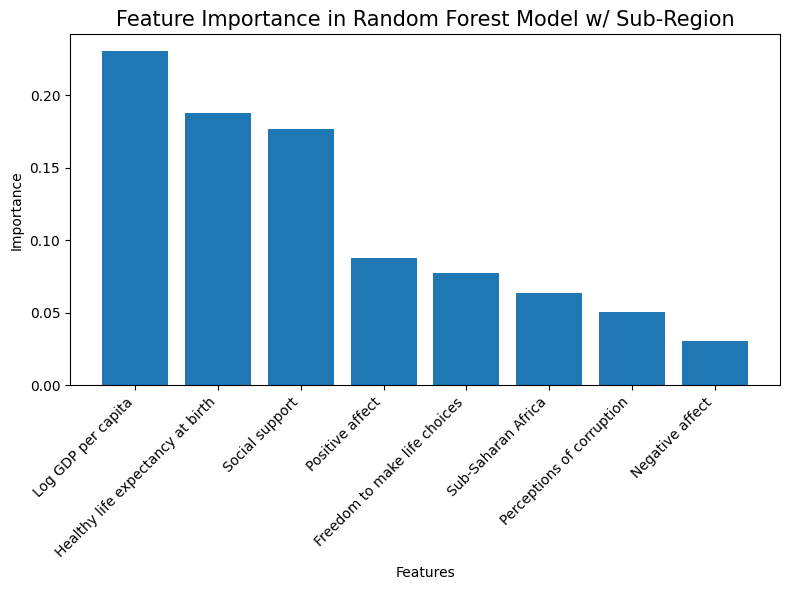

In [ ]:
#Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_subregion['feature'], feature_importance_subregion['importance'])
plt.title('Feature Importance in Random Forest Model w/ Sub-Region', fontsize=15)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#Checking for overfitting
rf_model2.fit(X2_train, y2_train)

train_pred = rf_model2.predict(X2_train)
test_pred = rf_model2.predict(X2_test)

train_r2 = r2_score(y2_train, train_pred)
test_r2 = r2_score(y2_test, test_pred)

train_mse = mean_squared_error(y2_train, train_pred)
test_mse = mean_squared_error(y2_test, test_pred)

print("Overfitting Diagnostics:")
print("Performance Comparison:")
print(f"   Training R² Score: {train_r2:.4f}")
print(f"   Testing R² Score:  {test_r2:.4f}")
print(f"   Training MSE:      {train_mse:.4f}")
print(f"   Testing MSE:       {test_mse:.4f}")

Overfitting Diagnostics:
Performance Comparison:
   Training R² Score: 0.9231
   Testing R² Score:  0.8740
   Training MSE:      0.0974
   Testing MSE:       0.1592
